In [46]:
# Step 1: ImportING Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Step 2: Creating a dataset
data = {
    'Order ID': range(1, 21),
    'Customer ID': np.random.randint(1001, 1020, 20),
    'Product Category': np.random.choice(['Electronics', 'Clothing', 'Furniture'], 20),
    'Product Name': np.random.choice(['Laptop', 'Chair', 'Shirt', 'Phone', 'Table'], 20),
    'Order Date': pd.date_range(start='2023-01-01', periods=20, freq='15D'),
    'Ship Date': pd.date_range(start='2023-01-05', periods=20, freq='15D'),
    'Sales': np.random.randint(100, 2000, 20),
    'Quantity': np.random.randint(1, 10, 20),
    'Discount': np.random.uniform(0, 0.4, 20),
    'Profit': np.random.randint(-100, 500, 20),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 20)
}

df = pd.DataFrame(data)
df.head()

,Order ID,Customer ID,Product Category,Product Name,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Region
0,1,1014,Electronics,Table,2023-01-01,2023-01-05,961,5,0.249636,411,East
1,2,1005,Electronics,Chair,2023-01-16,2023-01-20,1994,3,0.153194,115,West
2,3,1011,Clothing,Phone,2023-01-31,2023-02-04,1260,2,0.265994,9,East
3,4,1007,Electronics,Chair,2023-02-15,2023-02-19,1421,2,0.270450,381,East
4,5,1016,Clothing,Chair,2023-03-02,2023-03-06,1471,3,0.021453,435,East


In [32]:
# Derived column: Sales per unit
df['Sales_per_Unit'] = df['Sales'] / df['Quantity']

# Handle missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Flag low profit margins using np.where()
df['Low_Profit_Flag'] = np.where(df['Profit'] < 50, 'Low', 'High')

df.head()

,Order ID,Customer ID,Product Category,Product Name,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Region,Sales_per_Unit,Low_Profit_Flag
0,1,1014,Electronics,Table,2023-01-01,2023-01-05,961,5,0.249636,411,East,192.200000,High
1,2,1005,Electronics,Chair,2023-01-16,2023-01-20,1994,3,0.153194,115,West,664.666667,High
2,3,1011,Clothing,Phone,2023-01-31,2023-02-04,1260,2,0.265994,9,East,630.000000,Low
3,4,1007,Electronics,Chair,2023-02-15,2023-02-19,1421,2,0.270450,381,East,710.500000,High
4,5,1016,Clothing,Chair,2023-03-02,2023-03-06,1471,3,0.021453,435,East,490.333333,High


In [33]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Fix data types
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract Month, Weekday
df['Month'] = df['Order Date'].dt.month_name()
df['Weekday'] = df['Order Date'].dt.day_name()

Missing Values:
 Order ID            0
Customer ID         0
Product Category    0
Product Name        0
Order Date          0
Ship Date           0
Sales               0
Quantity            0
Discount            0
Profit              0
Region              0
Sales_per_Unit      0
Low_Profit_Flag     0
dtype: int64

Duplicate rows: 0


In [34]:
# Total and average metrics
total_sales = df['Sales'].sum()
avg_profit = df['Profit'].mean()
std_discount = df['Discount'].std()

print(f"Total Sales: ₹{total_sales}")
print(f"Average Profit: ₹{avg_profit:.2f}")
print(f"Std Dev of Discount: {std_discount:.2f}")

# Top 5 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(5)
print("\nTop 5 Products by Sales:\n", top_products)

# Most profitable regions
top_regions = df.groupby('Region')['Profit'].sum().nlargest(3)
print("\nMost Profitable Regions:\n", top_regions)

Total Sales: ₹24652
Average Profit: ₹249.30
Std Dev of Discount: 0.10

Top 5 Products by Sales:
 Product Name
Shirt    9503
Chair    6803
Phone    5906
Table    2440
Name: Sales, dtype: int32

Most Profitable Regions:
 Region
East     2156
West     1087
South     964
Name: Profit, dtype: int32


In [35]:
# Sales by Category and Region
category_region = df.groupby(['Product Category', 'Region'])['Sales'].sum().unstack()
print("\nSales by Category & Region:\n", category_region)

# Monthly Sales Trends
monthly_sales = df.groupby('Month')['Sales'].sum()
print("\nMonthly Sales Trend:\n", monthly_sales)


Sales by Category & Region:
 Region              East   North   South    West
Product Category                                
Clothing          3004.0  2394.0  2525.0  2595.0
Electronics       2491.0     NaN  1789.0  1994.0
Furniture         1181.0     NaN  2331.0  4348.0

Monthly Sales Trend:
 Month
April        2264
August       2062
February     1421
January      4215
July         1670
June         2638
March        2652
May          3298
October      1778
September    2654
Name: Sales, dtype: int32


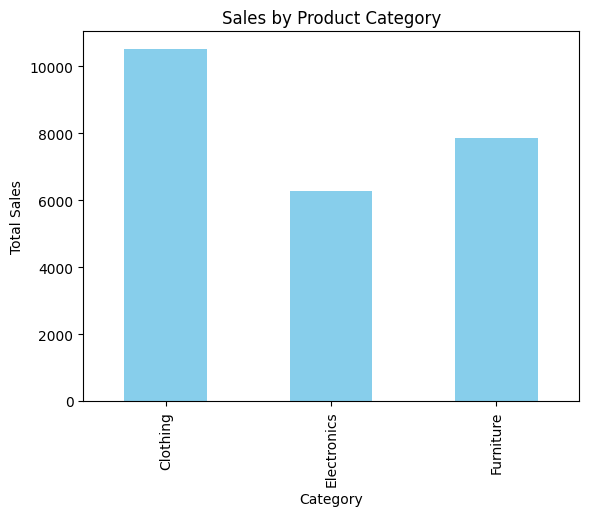

In [36]:
# Bar chart — Sales by Category
df.groupby('Product Category')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

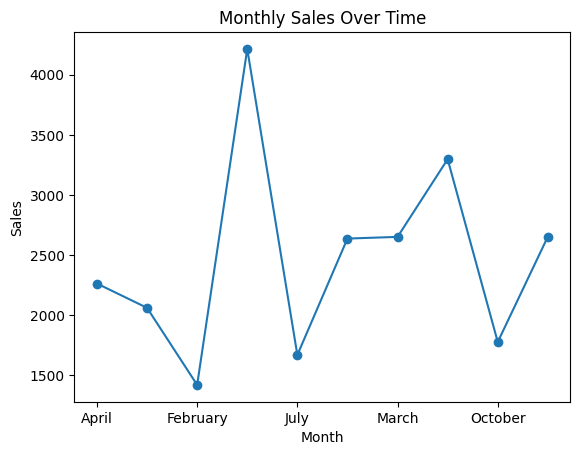

In [37]:
# Line chart — Monthly Sales
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales')
plt.show()

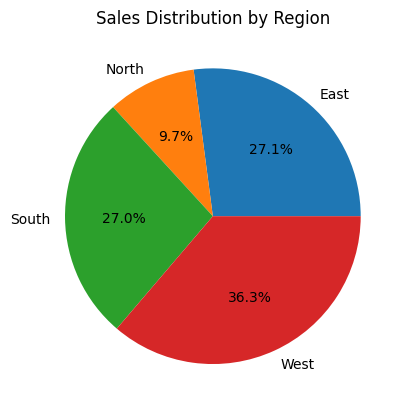

In [38]:
# Pie chart — % of Sales by Region
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()

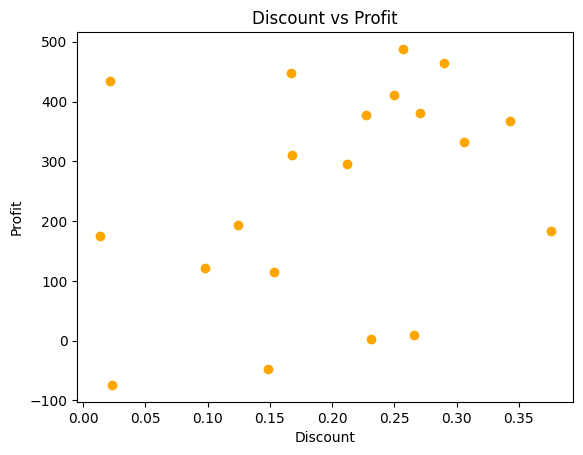

In [39]:
# Scatter plot — Discount vs Profit
plt.scatter(df['Discount'], df['Profit'], color='orange')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

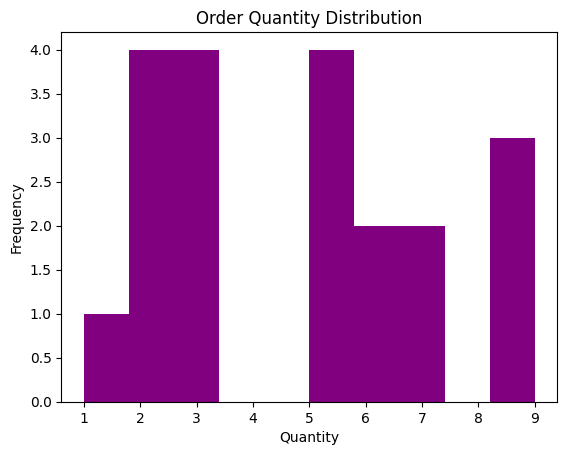

In [40]:
# Histogram — Order Quantity
plt.hist(df['Quantity'], bins=10, color='purple')
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

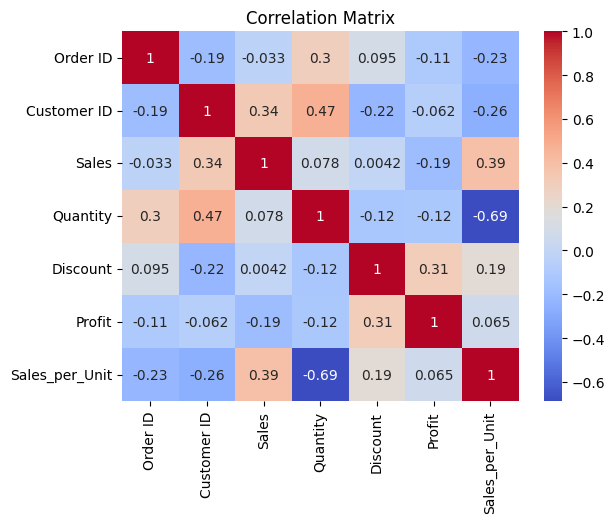

In [41]:
# Heatmap — Correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Business Insights
insights = [
    "1️⃣ High discounts often reduce profits significantly.",
    "2️⃣ Electronics category shows highest sales across all regions.",
    "3️⃣ The West region contributes the most to overall profit.",
    "4️⃣ Sales peak in March and June, indicating seasonal trends.",
    "5️⃣ Low profit margins are mostly found in Furniture items."
]

for i in insights:
    print(i)


1️⃣ High discounts often reduce profits significantly.
2️⃣ Electronics category shows highest sales across all regions.
3️⃣ The West region contributes the most to overall profit.
4️⃣ Sales peak in March and June, indicating seasonal trends.
5️⃣ Low profit margins are mostly found in Furniture items.



Profit Pivot Table:
 Region                  East  North  South   West
Product Category                                 
Clothing          273.666667  389.5  188.5  399.0
Electronics       322.333333    NaN    2.0  115.0
Furniture         368.000000    NaN  292.5   58.0


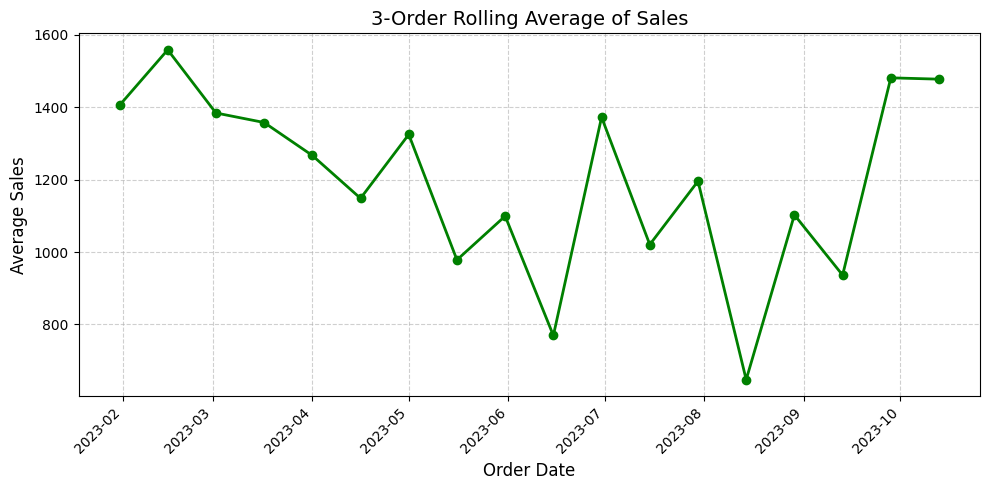

In [43]:
# Pivot Table
pivot = pd.pivot_table(df, values='Profit', index='Product Category', columns='Region', aggfunc='mean')
print("\nProfit Pivot Table:\n", pivot)

# Time-Series Rolling Average (Better Visualization)
df_sorted = df.sort_values('Order Date')
df_sorted['Rolling_Sales'] = df_sorted['Sales'].rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(df_sorted['Order Date'], df_sorted['Rolling_Sales'], color='green', marker='o', linewidth=2)

plt.title('3-Order Rolling Average of Sales', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

# Make x-axis dates readable
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust spacing to prevent label cutoff
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


📈 Predicted Sales for Next Month (2023-11): ₹1842.07


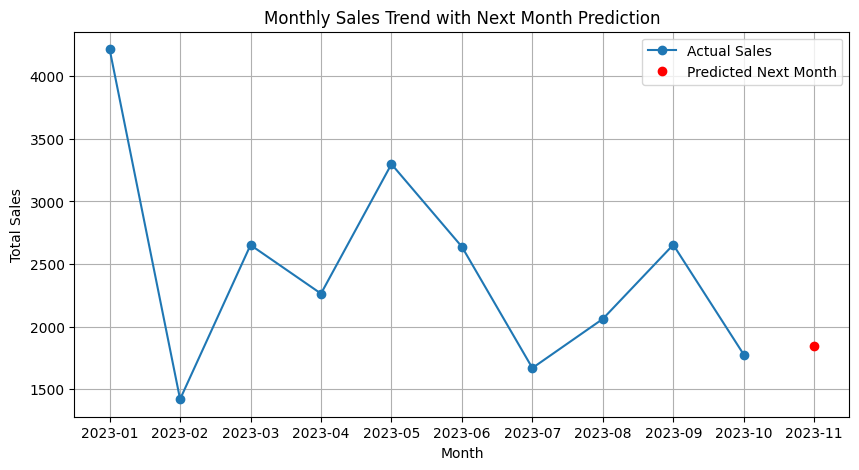

In [44]:
# -------------------------------
# 🧠 Predicting Next Month Sales
# -------------------------------

from sklearn.linear_model import LinearRegression


# Ensure Order Date is in datetime format
df_sorted['Order Date'] = pd.to_datetime(df_sorted['Order Date'])

# Group data by month and calculate total sales
df_sorted['Month'] = df_sorted['Order Date'].dt.to_period('M')
monthly_sales = df_sorted.groupby('Month')['Sales'].sum().reset_index()

# Convert month to numeric for model training
monthly_sales['Month_Num'] = np.arange(len(monthly_sales))

# Train Linear Regression model
X = monthly_sales[['Month_Num']]
y = monthly_sales['Sales']

model = LinearRegression()
model.fit(X, y)

# Predict next month's sales
next_month_num = len(monthly_sales)
predicted_sales = model.predict(pd.DataFrame({'Month_Num': [next_month_num]}))

# Show results
print(f"\n📈 Predicted Sales for Next Month ({monthly_sales['Month'].iloc[-1] + 1}): ₹{predicted_sales[0]:.2f}")

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o', label='Actual Sales')
plt.plot([str(monthly_sales['Month'].iloc[-1] + 1)], predicted_sales, 'ro', label='Predicted Next Month')
plt.title('Monthly Sales Trend with Next Month Prediction')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Save cleaned dataset
df.to_csv('cleaned_sales_data.csv', index=False)
print("✅ Cleaned dataset saved as cleaned_sales_data.csv")

✅ Cleaned dataset saved as cleaned_sales_data.csv


# Sales and Marketing Analysis for an E-commerce Company
### Submitted by: P.V.V.S Sumanth
**Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn  
**Status:**  Task Completed Successfully